# import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import boto3
import json


# Load Database

In [2]:
session = boto3.Session()
dynamodb = session.resource('dynamodb')

In [3]:
list(dynamodb.tables.all())

[dynamodb.Table(name='ChartWsConnections'),
 dynamodb.Table(name='GameEnumeration'),
 dynamodb.Table(name='GameTaskSwitch'),
 dynamodb.Table(name='GameWorkingMemory'),
 dynamodb.Table(name='Questions'),
 dynamodb.Table(name='Responses'),
 dynamodb.Table(name='SensorECG'),
 dynamodb.Table(name='SensorEYE'),
 dynamodb.Table(name='Surveys')]

# ECG

In [4]:
table = dynamodb.Table('SensorECG')
response = table.scan()
data = response['Items']

# Continue to scan if there are more items (pagination)
while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    data.extend(response['Items'])

In [11]:
df = pd.DataFrame(data)
df = df['payload'].apply(pd.Series)
print(df['game_type'].unique())
print(df['user_id'].unique())

['Setup' 'Welcome' 'Surveys' 'Baseline Instructions' 'Baseline'
 'Instructions' 'Game' 'Enumeration' 'Pre-Survey' 'TaskSwitching']
['1425' 'Quang' '6374' 'TEST123' 'null subjectId' 'test1234' 'test'
 'test13' 'test123' 'test12' 'testks']


In [43]:
current_df = df[df['user_id'] == 'test']
#print(current_df['game_type'].unique())

In [44]:
current_df


,computer_name,game_type,ecg_data,user_id,timestamp,eda_data
32324,,Setup,0,test,1723643009910,NaN
32325,,Setup,-1,test,1723643009914,NaN
32326,,Setup,-3,test,1723643009918,NaN
32327,,Setup,-4,test,1723643009922,NaN
32328,,Setup,-5,test,1723643009926,NaN
...,...,...,...,...,...,...
36017,,Setup,188,test,1726838395193,NaN
36018,,Setup,188,test,1726838395725,NaN
36019,,Setup,215,test,1726838396793,NaN
36020,,Setup,213,test,1726838402537,NaN


C:\Users\Firefly996\AppData\Local\Temp\ipykernel_16172\1800614891.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


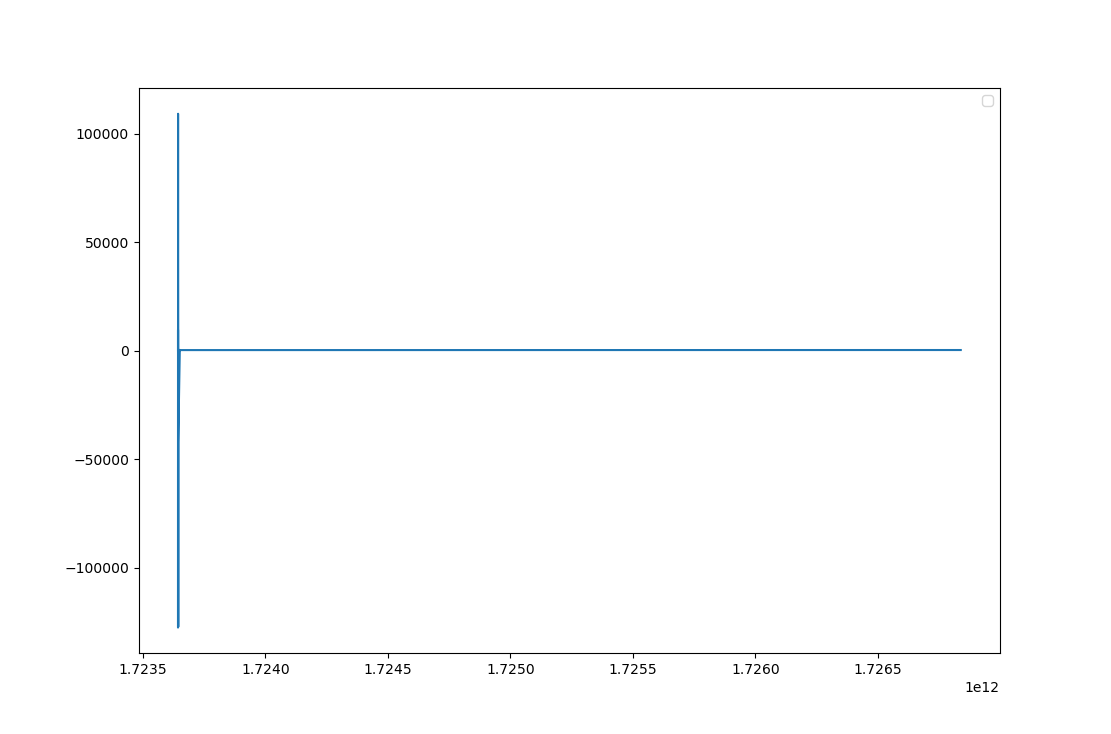

In [45]:
%matplotlib ipympl
plt.clf()
plt.plot(current_df['timestamp'],current_df['ecg_data'])
plt.legend()
plt.show()

# Game_type

In [49]:
table = dynamodb.Table('GameEnumeration')
response = table.scan()
data = response['Items']

# Continue to scan if there are more items (pagination)
while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    data.extend(response['Items'])

In [50]:
df = pd.DataFrame(data)
df

,payload,user_id,timestamp
0,"{'block_no': 2, 'difficulty': 'Medium', 'compu...",test17,1723568723110
1,"{'block_no': 2, 'difficulty': 'Medium', 'compu...",test14,17235687231
2,"{'block_no': 2, 'difficulty': 'Medium', 'start...",test20,1723568723110
3,"{'block_no': 2, 'difficulty': 'Medium', 'start...",test20,1723568723110.3434
4,"{'block_no': 1, 'difficulty': 'Hard', 'start_t...",TEST123,1725638761923
5,"{'block_no': 1, 'difficulty': 'Hard', 'start_t...",TEST123,1725638774796
6,"{'block_no': 1, 'difficulty': 'Hard', 'start_t...",TEST123,1725638831190
7,"{'block_no': 1, 'difficulty': 'Hard', 'start_t...",TEST123,1725638841127
8,"{'block_no': 1, 'difficulty': 'Hard', 'start_t...",TEST123,1725638845108
9,"{'block_no': 1, 'difficulty': 'Hard', 'start_t...",TEST123,1725638850124


# Survey

In [57]:
table = dynamodb.Table('Responses')
response = table.scan()
data = response['Items']

# Continue to scan if there are more items (pagination)
while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    data.extend(response['Items'])

In [58]:
df_respond = pd.DataFrame(data)
df_respond = df_respond[df_respond['user_id'] == 'Quang']
df_respond

,completed,version,answers,user_id,survey_id,timestamp
1,True,1,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_Enumeration,1726856202778
2,True,2,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_Enumeration,1726856336419
3,True,3,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_Enumeration,1726856459780
4,True,1,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_TS,1726856719442
5,True,2,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_TS,1726856891803
6,True,3,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_TS,1726857068585
7,True,1,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_WM,1726857372507
8,True,2,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_WM,1726857552329
9,True,3,{'1': {'question': 'How challenging was it? Ho...,Quang,Descartes_WM,1726857933311
10,True,1,{'11': {'question': 'I am able to focus on the...,Quang,Cognitive_And_Affective_Mindfulness_Scale,1726858086951


In [59]:
table = dynamodb.Table('Questions')
response = table.scan()
data = response['Items']

# Continue to scan if there are more items (pagination)
while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    data.extend(response['Items'])

In [61]:
df_question = pd.DataFrame(data)
df_question

,question_text,active,survey_id,question_type,condition,question_id,options,order
0,I am able to pay close attention to one thing ...,True,Cognitive_And_Affective_Mindfulness_Scale,multiple_choice,{},0890093b-303c-41f1-8a3b-730462774b2b,"[1, 2, 3, 4]",12
1,I try to notice my thoughts without judging th...,True,Cognitive_And_Affective_Mindfulness_Scale,multiple_choice,{},3186eeb5-9b45-46af-9707-7795088bcecd,"[1, 2, 3, 4]",9
2,I am able to accept the thoughts and feelings ...,True,Cognitive_And_Affective_Mindfulness_Scale,multiple_choice,{},37772fbb-fed5-4142-83c7-850cb58af3a7,"[1, 2, 3, 4]",10
3,I am preoccupied by the past. (1 = Rarely/Not ...,True,Cognitive_And_Affective_Mindfulness_Scale,multiple_choice,{},3b0ab521-2ca0-4ea2-a106-77ff80b95d77,"[1, 2, 3, 4]",7
4,It's easy for me to keep track of my thoughts ...,True,Cognitive_And_Affective_Mindfulness_Scale,multiple_choice,{},5f2dcdcf-c515-4051-9bc0-30fb86b89205,"[1, 2, 3, 4]",8
...,...,...,...,...,...,...,...,...
415,"I change jobs. (1 = Rarely/Never, 4 = Almost A...",True,Barratt_Impulsiveness_Scale,multiple_choice,{},d6c361f2-34d2-4be3-91d9-fccf6617512b,"[1, 2, 3, 4]",16
416,I am more interested in the present than the f...,True,Barratt_Impulsiveness_Scale,multiple_choice,{},d9bc4df9-1c26-4466-821d-67b8e3e9b057,"[1, 2, 3, 4]",27
417,"I am a steady thinker. (1 = Rarely/Never, 4 = ...",True,Barratt_Impulsiveness_Scale,multiple_choice,{},d9fb06a6-59c6-489a-9a82-96b4150150bb,"[1, 2, 3, 4]",20
418,I can only think about one thing at a time. (1...,True,Barratt_Impulsiveness_Scale,multiple_choice,{},e171318c-f383-4248-b8ab-a6e65177cfc5,"[1, 2, 3, 4]",23


In [126]:
list_question = df_question['survey_id'].unique()
print(len(list_question))
list_question

24


array(['Cognitive_And_Affective_Mindfulness_Scale',
       'Interpersonal_Trust_Scale', 'Descartes_Enumeration',
       'Stress_Reducing_Activities_Survey', 'Neurometryx_Video_Feedback',
       'Descartes_Demographic', 'Effort_Reward_Imbalance_Scale',
       'State_Trait_Anxiety', 'Generalized_Anxiety_Disorder_Screener',
       'Perceived_Stress_Scale', 'Patient_Health_Questionnaire',
       'The_Resilience_Scale',
       'Contemplative_Practices_Behavior_Inventory',
       'Multidimensional_Assessment_Of_Interoceptive_Awareness',
       'Positive_And_Negative_Affect_Scale',
       'Pittsburgh_Sleep_Quality_Index', 'State_Probes', 'Descartes_WM',
       'Kessler_Psychological_Distress_Scale', 'Descartes_TS',
       'Copenhagen_Burnout_Inventory', 'Descartes_Gaming',
       'Demographic_Inventory', 'Barratt_Impulsiveness_Scale'],
      dtype=object)

In [127]:
list_respond = df_respond['survey_id'].unique()
print(len(list_respond))
list_respond

21


array(['Descartes_Enumeration', 'Descartes_TS', 'Descartes_WM',
       'Cognitive_And_Affective_Mindfulness_Scale',
       'Pittsburgh_Sleep_Quality_Index',
       'Stress_Reducing_Activities_Survey', 'Interpersonal_Trust_Scale',
       'Effort_Reward_Imbalance_Scale', 'State_Trait_Anxiety',
       'Generalized_Anxiety_Disorder_Screener', 'Perceived_Stress_Scale',
       'Patient_Health_Questionnaire', 'The_Resilience_Scale',
       'Contemplative_Practices_Behavior_Inventory',
       'Multidimensional_Assessment_Of_Interoceptive_Awareness',
       'Positive_And_Negative_Affect_Scale',
       'Kessler_Psychological_Distress_Scale',
       'Copenhagen_Burnout_Inventory', 'Descartes_Gaming',
       'Demographic_Inventory', 'Barratt_Impulsiveness_Scale'],
      dtype=object)

In [129]:
difference = list(set(list_question) - set(list_respond))
difference

['Descartes_Demographic', 'Neurometryx_Video_Feedback', 'State_Probes']

In [82]:
pd.set_option('display.max_colwidth', None)

In [169]:
TOPIC = 'Barratt_Impulsiveness_Scale'

In [170]:
print(df_question[df_question['survey_id'] == TOPIC].shape)
df_question[df_question['survey_id'] == TOPIC].sort_values('order')


(30, 8)


,question_text,active,survey_id,question_type,condition,question_id,options,order
396,"I plan tasks carefully. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},3c7a5248-0394-4c0a-ac8a-9522cee85f17,"[1, 2, 3, 4]",1
412,"I do things without thinking. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},bd163d36-e06b-4b48-ad9a-05568ef59052,"[1, 2, 3, 4]",2
398,"I make-up my mind quickly. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},52c3515d-07ff-4462-810c-a0a15faa7cf7,"[1, 2, 3, 4]",3
394,"I am happy-go-lucky. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},31a1ab21-4477-4d26-b789-b6fa111f5408,"[1, 2, 3, 4]",4
402,"I don't ""pay attention."" (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},65e6eb79-b881-4aca-b592-ea1978ad7e0d,"[1, 2, 3, 4]",5
410,"I have ""racing"" thoughts. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},af68496b-9156-4ba4-b312-e18a6e42342a,"[1, 2, 3, 4]",6
390,"I plan trips well ahead of time. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},06dbaa97-134c-4a1e-9769-0f5d7d764257,"[1, 2, 3, 4]",7
413,"I am self controlled. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},bf33c3d1-038c-48b6-b624-4e69988b7e9a,"[1, 2, 3, 4]",8
391,"I concentrate easily. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},1227d14d-0521-4ebb-911c-1e00c64ad1d0,"[1, 2, 3, 4]",9
399,"I save regularly. (1 = Rarely/Never, 4 = Almost Always/Always)",True,Barratt_Impulsiveness_Scale,multiple_choice,{},5be92283-139e-430f-adb9-5ea42454a1ba,"[1, 2, 3, 4]",10


In [171]:
df_respond[df_respond['survey_id'] == TOPIC]
temp_df = df_respond[df_respond['survey_id'] == TOPIC]['answers'].apply(pd.Series)
temp_df2 = pd.DataFrame()
for i in range(1, len(temp_df.columns) +1):
    try:
        temp_df[str(i)]
    except KeyError:
            continue
    temp_df2 = pd.concat([temp_df2,temp_df[str(i)].apply(pd.Series)])
print(temp_df2.shape)
temp_df2

(30, 3)


,question,question_id,response
27,"I plan tasks carefully. (1 = Rarely/Never, 4 = Almost Always/Always)",3c7a5248-0394-4c0a-ac8a-9522cee85f17,4
27,"I do things without thinking. (1 = Rarely/Never, 4 = Almost Always/Always)",bd163d36-e06b-4b48-ad9a-05568ef59052,3
27,"I make-up my mind quickly. (1 = Rarely/Never, 4 = Almost Always/Always)",52c3515d-07ff-4462-810c-a0a15faa7cf7,2
27,"I am happy-go-lucky. (1 = Rarely/Never, 4 = Almost Always/Always)",31a1ab21-4477-4d26-b789-b6fa111f5408,3
27,"I don't ""pay attention."" (1 = Rarely/Never, 4 = Almost Always/Always)",65e6eb79-b881-4aca-b592-ea1978ad7e0d,3
27,"I have ""racing"" thoughts. (1 = Rarely/Never, 4 = Almost Always/Always)",af68496b-9156-4ba4-b312-e18a6e42342a,2
27,"I plan trips well ahead of time. (1 = Rarely/Never, 4 = Almost Always/Always)",06dbaa97-134c-4a1e-9769-0f5d7d764257,1
27,"I am self controlled. (1 = Rarely/Never, 4 = Almost Always/Always)",bf33c3d1-038c-48b6-b624-4e69988b7e9a,3
27,"I concentrate easily. (1 = Rarely/Never, 4 = Almost Always/Always)",1227d14d-0521-4ebb-911c-1e00c64ad1d0,4
27,"I save regularly. (1 = Rarely/Never, 4 = Almost Always/Always)",5be92283-139e-430f-adb9-5ea42454a1ba,3


In [173]:
TOPIC = 'Descartes_Demographic'
print(df_question[df_question['survey_id'] == TOPIC].shape)
df_question[df_question['survey_id'] == TOPIC].sort_values('order')

(8, 8)


,question_text,active,survey_id,question_type,condition,question_id,options,order
94,Age (years),True,Descartes_Demographic,textbox,NaN,9aa59887-fde1-4a94-88ab-752476e7e7e1,None,1
91,Gender,True,Descartes_Demographic,multiple_choice,NaN,04a5254f-aaf7-4897-8877-2cc9d6468b97,"[Male, Female, Non-binary, Prefer not to say]",2
92,Race,True,Descartes_Demographic,multiple_choice,NaN,4c0db65d-1516-4ea0-927a-7e6950598dbe,"[Asian, Black/African-American, Hispanic/Latino, Native American, White/Caucasian, Other, Prefer not to say]",3
96,Education level completed,True,Descartes_Demographic,multiple_choice,NaN,b0fc0de3-5dc2-4623-ac0e-0f5a1e2f557d,"[Less than high school, High school diploma/GED, Some college/Associate's degree, Bachelor's degree, Master's degree, Doctorate degree, Prefer not to say]",4
93,"On average, how frequently do you smoke cigarettes or use another form of tobacco/nicotine? (Choose only one option)",True,Descartes_Demographic,multiple_choice,NaN,9596bc9f-a730-496f-b595-0c948180cea2,"[Never, Rarely, A few times per month, A few times per week, Every day]",5
98,On average how many times per day do you smoke cigarettes or use another form of tobacco/nicotine?,True,Descartes_Demographic,textbox,NaN,c277b0a7-29b2-4b1b-be7c-29070761492a,None,6
95,"On average, how frequently do you consume caffeinated beverages? (Choose only one)",True,Descartes_Demographic,multiple_choice,NaN,b053a291-b3b9-4861-a6d7-d5dbdb48fe1e,"[Never, Rarely, A few times per month, A few times per week, Every day]",7
97,On average how many caffeinated beverages do you consume per day (number of cups)?,True,Descartes_Demographic,textbox,NaN,b19962e6-f3f7-417d-8c05-eb65e0071a9f,None,8


In [174]:
TOPIC = 'Neurometryx_Video_Feedback'
print(df_question[df_question['survey_id'] == TOPIC].shape)
df_question[df_question['survey_id'] == TOPIC].sort_values('order')


(6, 8)


,question_text,active,survey_id,question_type,condition,question_id,options,order
85,After watching the video how does this make you feel?,True,Neurometryx_Video_Feedback,textbox,{},0ae6015f-eecd-42c1-92d4-218fd58d65db,None,1
86,Did you find the information in the video helpful?,True,Neurometryx_Video_Feedback,textbox,{},48927c36-3770-4bb8-9a7b-0b48beefd0b9,None,2
90,When would you recommend a participant view this video?,True,Neurometryx_Video_Feedback,textbox,{},e9754ee2-fd5e-4381-8c67-8710f2f1784a,None,3
88,What did you like about this video?,True,Neurometryx_Video_Feedback,textbox,{},bc2ff2e8-d6f6-463c-abc5-eabc4b060660,None,4
87,What did you dislike about this video?,True,Neurometryx_Video_Feedback,textbox,{},b8b767c4-e4b1-4d73-a147-6332a28ab076,None,5
89,Do you feel there was missing information from the video based on your experience with Neurometryx?,True,Neurometryx_Video_Feedback,textbox,{},c2ed2d11-8b4e-4c38-89fa-db28ba263fcf,None,6


In [177]:
TOPIC = 'State_Probes'
print(df_question[df_question['survey_id'] == TOPIC].shape)
df_question[df_question['survey_id'] == TOPIC].sort_values('order')

(5, 8)


,question_text,active,survey_id,question_type,condition,question_id,options,order
291,How challenging was it? How hard did you have to work?,True,State_Probes,multiple_choice,NaN,7fb27c8b-ba6f-4e9b-996e-48896abfbe5d,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]",1
288,How successful were you in accomplishing the task goals?,True,State_Probes,multiple_choice,NaN,56ff4fd3-3171-481b-9a60-937f2c65df0f,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]",2
289,"How stressful, discouraging, and irritating was the task?",True,State_Probes,multiple_choice,NaN,5a799a4f-0d66-4852-a6b7-ac1c4964e6a4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]",3
290,How mentally demanding was the task?,True,State_Probes,multiple_choice,NaN,740bc28a-ebad-442d-a453-4005d3a0c079,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]",4
292,How hurried or rushed was the pace of the task?,True,State_Probes,multiple_choice,NaN,fe040174-df08-4698-83ac-0ff3c149a20e,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]",5


In [178]:
table = dynamodb.Table('Surveys')
response = table.scan()
data = response['Items']

# Continue to scan if there are more items (pagination)
while 'LastEvaluatedKey' in response:
    response = table.scan(ExclusiveStartKey=response['LastEvaluatedKey'])
    data.extend(response['Items'])

In [179]:
df = pd.DataFrame(data)

,instructions,active,order,description,survey_id,title
0,"People have a variety of ways of relating to their thoughts and feelings. For each of the items below, rate how much each of these ways applies to you. 0 = Rarely/Not at All, 2 = Sometimes, 3 = Often, 4 = Almost Always/Always",True,Pre-Assessment,The CAMS-R is a 12-item measure designed to capture a broad conceptualization of mindfulness with language that is not specific to any particular type of meditation training.,Cognitive_And_Affective_Mindfulness_Scale,Cognitive and Affective Mindfulness Scale
1,"1 = Strongly Disagree, 7 = Strongly Agree",True,Pre-Assessment,Interpersonal Trust Scale Questionnaire administered at start of the study.,Interpersonal_Trust_Scale,Interpersonal Trust Scale Questionnaire
2,Fill out the questionnaire after each difficulty level.,True,Post-Assessment,State probe survey for enumeration task.,Descartes_Enumeration,Enumeration Task Survey
3,"Please answer all questions to the best of your ability. For each activity, indicate how often you engage in it and, if applicable, how much you typically spend on it.",True,Pre-Assessment,This survey aims to gather information about the frequency and cost of various stress-reducing activities that individuals engage in.,Stress_Reducing_Activities_Survey,Stress-Reducing Activities Survey
4,Watch the brief video that advertises the assessment you have now completed twice. Please respond to the questions below.,True,Post-Assessment,This survey collects feedback on the Neurometryx assessment promotional video that participants have watched twice.,Neurometryx_Video_Feedback,Neurometryx Video Feedback
5,Answer each question to the best of your ability.,False,Pre-Assessment,General demographic survey.,Descartes_Demographic,Descartes Demographic Survey
6,Please indicate how much you agree or disagree with each statement about your work situation.,True,Pre-Assessment,"This scale assesses the balance between efforts made at work and rewards received, as well as overcommitment to work.",Effort_Reward_Imbalance_Scale,Effort Reward Imbalance Scale
7,Several statements people have used to describe themselves are given\nbelow. Read each statement and then select the appropriate number \nto indicate how you usually feel. There are no right or wrong answers. Do not spend too much time on any one statement but give the answer which seemed to describe your present feelings best.,True,Pre-Assessment,"A widely used, validated, and reliable, self-report questionnaire to assess both state and\ntrait levels of anxiety. Each scale contains 20 items related to worry, tension, stress, and anxiety.\nIndividuals rate themselves for each item on a scale of 1-4 with 1 indicating “not at all,” 2\n“Somewhat,” 3 “Moderately,” and 4 indicating “very much so.” For most participants, the two\nscales should take less than 10 minutes to complete.",State_Trait_Anxiety,State-Trait Anxiety
8,"Over the last 2 weeks, how often have you been bothered by the following problems?",True,Pre-Assessment,The Generalized Anxiety Disorder Screener (GAD-7) is a 7-item questionnaire used as a screening tool and severity measure for generalized anxiety disorder.,Generalized_Anxiety_Disorder_Screener,Generalized Anxiety Disorder Screener
9,"The questions in this scale ask you about your feelings and thoughts during the last month. In each case, please indicate how often you felt or thought a certain way.",True,Pre-Assessment,"The Perceived Stress Scale - 10 Item is a measure of the degree to which situations in one's life are appraised as stressful. Items were designed to tap how unpredictable, uncontrollable, and overloaded respondents find their lives.",Perceived_Stress_Scale,Perceived Stress Scale
